In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shuttle-landing-control.csv')
df.head()

,Class,STABILITY,ERROR,SIGN,WIND,MAGNITUDE,VISIBILITY
0,2,*,*,*,*,*,2
1,1,2,*,*,*,*,1
2,1,1,2,*,*,*,1
3,1,1,1,*,*,*,1
4,1,1,3,2,2,*,1


In [2]:
df_re = df.replace('*', np.NaN)
df_re.isnull().sum()

Class         0
STABILITY     2
ERROR         3
SIGN          8
WIND          8
MAGNITUDE     5
VISIBILITY    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
null_list = ['STABILITY','ERROR','SIGN','WIND','MAGNITUDE']
for lis in null_list:
    df_re[lis] = imp.fit_transform(df_re[lis][:,np.newaxis])


/tmp/ipykernel_3779/2446339556.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_re[lis] = imp.fit_transform(df_re[lis][:,np.newaxis])
/tmp/ipykernel_3779/2446339556.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_re[lis] = imp.fit_transform(df_re[lis][:,np.newaxis])
/tmp/ipykernel_3779/2446339556.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_re[lis] = imp.fit_transform(df_re[lis][:,np.newaxis])
/tmp/ipykernel_3779/2446339556.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

<AxesSubplot:>

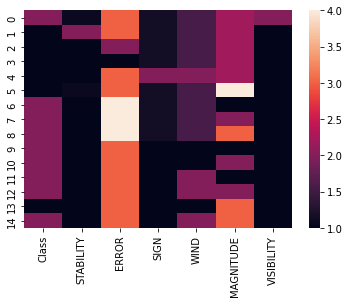

In [11]:
sns.heatmap(df_re)

In [14]:
df_re.describe()

,Class,STABILITY,ERROR,SIGN,WIND,MAGNITUDE,VISIBILITY
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.600000,1.076923,3.000000,1.142857,1.571429,2.200000,1.066667
std,0.507093,0.256776,0.755929,0.247436,0.349927,0.828079,0.258199
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,1.571429,2.000000,1.000000
50%,2.000000,1.000000,3.000000,1.142857,1.571429,2.200000,1.000000
75%,2.000000,1.000000,3.000000,1.142857,1.785714,2.600000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000


In [15]:
df_re.head()

,Class,STABILITY,ERROR,SIGN,WIND,MAGNITUDE,VISIBILITY
0,2,1.076923,3.0,1.142857,1.571429,2.2,2
1,1,2.000000,3.0,1.142857,1.571429,2.2,1
2,1,1.000000,2.0,1.142857,1.571429,2.2,1
3,1,1.000000,1.0,1.142857,1.571429,2.2,1
4,1,1.000000,3.0,2.000000,2.000000,2.2,1


Text(0.5, 0, 'sign')

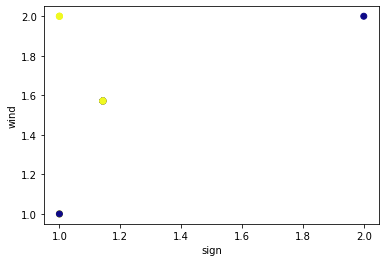

In [16]:
plt.scatter(df_re.SIGN, df_re.WIND, cmap='plasma', c =df_re.Class)
plt.ylabel('wind')
plt.xlabel('sign')

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WIND', ylabel='Density'>

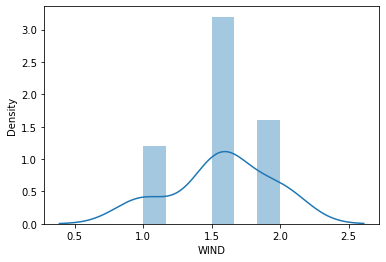

In [17]:
sns.distplot(df_re.WIND)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

naive =  GaussianNB()
randomforest = RandomForestClassifier()
decision = DecisionTreeClassifier()
knneigh = KNeighborsClassifier(n_neighbors=3)

models = [naive, randomforest, decision, knneigh]

In [23]:
X = df_re.drop(['Class'], axis=1)
y = df_re.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}: {accuracy_score(y_test, y_pred)} {balanced_accuracy_score(y_test, y_pred)}')

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}:\n{classification_report(y_test, y_pred)}')

GaussianNB(): 0.45454545454545453 0.625
RandomForestClassifier(): 0.2727272727272727 0.5
DecisionTreeClassifier(): 0.45454545454545453 0.625
KNeighborsClassifier(n_neighbors=3): 0.2727272727272727 0.5
GaussianNB():
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         3
           2       1.00      0.25      0.40         8

    accuracy                           0.45        11
   macro avg       0.67      0.62      0.45        11
weighted avg       0.82      0.45      0.43        11

RandomForestClassifier():
              precision    recall  f1-score   support

           1       0.27      1.00      0.43         3
           2       0.00      0.00      0.00         8

    accuracy                           0.27        11
   macro avg       0.14      0.50      0.21        11
weighted avg       0.07      0.27      0.12        11

DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       0.33 

/home/derrick-shibero/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/derrick-shibero/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/derrick-shibero/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/derr

In [24]:
import pickle
pickle.dump(naive, open('GaussianNB.pkl', 'wb'))